In [24]:
import os

# import pickle, re
import numpy as np
import xml.etree.ElementTree as ET
import PIL

from IPython.display import Image
# from PIL import Image
from matplotlib import image, pyplot

%load_ext autoreload
%aimport helpers

from inkml2img import inkml2img

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Collect all data

In [2]:
# All inkml files are divided into various folders under 'data/'

BASE_PATH = 'data'
dirs = os.listdir(BASE_PATH)

train_dirs = []
test_dirs = []
for d in dirs:
    if 'train' in d.lower():
        train_dirs.append(d)
    if 'test' in d.lower():
        test_dirs.append(d)
        
print('Training samples grabbed from:', train_dirs)
print('Test samples grabbed from:', test_dirs)

Training samples grabbed from: ['trainData_2012_part1', 'MatricesTrain2014', 'CROHME_training_2011', 'trainData_2012_part2', 'TrainINKML_2013']
Test samples grabbed from: ['TestINKML_2013', 'MatricesTest2014', 'testData_2012', 'CROHME_test_2011']


## Separate training data

In [3]:
# Create list of files in directory
def get_file_list(directories, base_path='data/'):
    files = []
    for directory in directories:
        path = os.path.join(BASE_PATH, directory)
        files.extend([os.path.join(path, file) for file in os.listdir(path) if file.endswith(".inkml")])
    return files

train_files = get_file_list(train_dirs)
test_files = get_file_list(test_dirs)
print('Total number of samples:', len(train_files))
print('Test set files:', len(test_files))

Total number of samples: 11350
Test set files: 1629


## Execute preprocessing

### Code is set up to look for png's in an `images` directory

In [17]:
%autoreload 1

# If images/ directory doesn't exist, create it:
if not os.path.exists('images'):
    os.makedirs('images')

### Extract labels, image paths, and any problem files

In [55]:
train_Y, image_paths_X, problem_files_X = helpers.generate_dataset(train_files[:3])
test_Y, image_paths_Y, problem_files_Y = helpers.generate_dataset(test_files[:3])

<Figure size 432x288 with 0 Axes>

### Process images to greyscale & uniform size

In [56]:
train_X = helpers.process_images(image_paths_X)
test_X = helpers.process_images(image_paths_Y)

## Check the data

\log_{2} 8 + \log_{3} 9 + \log_{4} 1 6


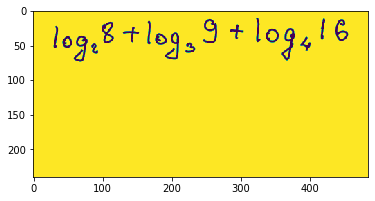

In [57]:
# Check our labels are still in sync with our file paths
pyplot.imshow(train_X[2])
print(labels[-1])

## Check that all images are uniform size

In [58]:
max_dims = helpers.get_max_dims(image_paths)
print('Max dimensions of dataset:', max_dims)

check = [True if x.shape == max_dims else False for x in train_X]

# Is it all true?
errors = sum(check) - len(check)
print('Number of images not the max dim size:', errors)

Max dimensions of dataset: (240, 484)
Number of images not the max dim size: 0


## Save the training array data

In [59]:
if errors == 0:
    pickle.dump(X, open('train_X.p', 'wb'))
    pickle.dump(Y, open('train_Y.p', 'wb'))
    
    SMALL_N = 100
    pickle.dump(X[:SMALL_N], open('train_X_small.p', 'wb'))
    pickle.dump(Y[:SMALL_N], open('train_Y_small.p', 'wb'))

NameError: name 'pickle' is not defined

In [54]:
test_dirs

['TestINKML_2013', 'MatricesTest2014', 'testData_2012', 'CROHME_test_2011']